Most of this code can be found at <a href='https://keras.io'>keras.io</a>

## Questions
- what is an activation function and how does it fit into a neural network?
    - calculates a value using weights and nodes
    - this value is stored into the next layer in a node

- when do we use a sigmoid activation?
    - when we have a binary output

- when do we use a linear activation? 
    - when we need continuous, but really never
    
- what activations are the most common to use for hidden layers? 
    - ReLu, Leaky ReLu


## Objectives 
YWBAT 
- build a neural network using keras
- compare models based on their depth
- *choose the best optimizer for a model*

In [1]:
def relu(x):
    return x if x > 0 else 0


def leaky_relu(x, m):
    return x if x > 0 else -m*x

### Why do we use NNs?
- identify combinations of features and learn combinations of features
- reduces the need for domain expertise
    - unstructured data is handled better
    - ambiguous data

### Outline
* Import data
* Build single layer model
* Build 2 layer model
* Students build their own deep learning model
* evaluate models, tune optimizers

# Useful Imports

In [2]:
import keras
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
from keras import models
from keras import layers
from keras import optimizers

# Obtaining Dataset & Train-Test Split

Nothing different from training other models

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
x = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

In [5]:
df = pd.DataFrame(x, columns=feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
names, df['target'].unique()

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'), array([0, 1, 2]))

In [9]:
# One hot encoding
# if we don't encode 
# 
enc = OneHotEncoder()
print(y.shape)
y = enc.fit_transform(y[:, np.newaxis]).toarray()

(150,)


(150, 3)

In [11]:
 # Scale data to have mean 0 and variance 1 
# # which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
# # Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=2)

In [12]:
"""
Attribute Information:

fLength: continuous # major axis of ellipse [mm]
fWidth: continuous # minor axis of ellipse [mm]
fSize: continuous # 10-log of sum of content of all pixels [in #phot]
fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
fConc1: continuous # ratio of highest pixel over fSize [ratio]
fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
fM3Long: continuous # 3rd root of third moment along major axis [mm]
fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
fAlpha: continuous # angle of major axis with vector to origin [deg]
fDist: continuous # distance from origin to center of ellipse [mm]
class: g,h # gamma (signal), hadron (background)
"""

'\nAttribute Information:\n\nfLength: continuous # major axis of ellipse [mm]\nfWidth: continuous # minor axis of ellipse [mm]\nfSize: continuous # 10-log of sum of content of all pixels [in #phot]\nfConc: continuous # ratio of sum of two highest pixels over fSize [ratio]\nfConc1: continuous # ratio of highest pixel over fSize [ratio]\nfAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]\nfM3Long: continuous # 3rd root of third moment along major axis [mm]\nfM3Trans: continuous # 3rd root of third moment along minor axis [mm]\nfAlpha: continuous # angle of major axis with vector to origin [deg]\nfDist: continuous # distance from origin to center of ellipse [mm]\nclass: g,h # gamma (signal), hadron (background)\n'

In [4]:
### Let's load in some custom data
df = pd.read_csv("MagicTelescope.csv")
display(df.head(2))
df.drop("ID", axis=1, inplace=True)
df.head(2)

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g


,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g


In [10]:
X, y = df.drop('class:', axis=1), df["class:"]
y.shape

(19020,)

In [11]:
# one-hot encode your target in order to use softmax activation
# softmax activation is better under optimization
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()
y.shape, y

((19020, 2), array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

### What did we learn?
- use Relu on dense layers that aren't going to the output
- onehotencode target (even if binary) because
    - because we can then use `softmax` activation
    - `softmax` activation performs much better than `sigmoid` under gradient descent

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=2)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((11412, 10), (7608, 10), (11412, 2), (7608, 2))

# Creating a Neural Network

`Sequential` is referring to the neural networks we've observed. There are other neural network models that will go beyond this class.

In [13]:
from keras.models import Sequential # this just means we go through our network in order of our layers

model = Sequential()

W0110 13:21:41.083324 140736002601856 deprecation_wrapper.py:119] From /Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [18]:
x.shape, x_train.shape, x_test.shape, y.shape

((150, 4), (120, 4), (30, 4), (150, 3))

The actual network; we can decide how many layers & nodes for each layer here as well as other hyperparameters like the activation function.

In [29]:
from keras.layers import Dense

model = Sequential()

# first hidden layer
model.add(Dense(units=16, activation='relu', input_dim=4, use_bias=True))

# output layer
model.add(Dense(units=3, activation='softmax'))

In [30]:
model.summary()

# what does param # represent?
# number of weights (edges) connecting the layer to the previous layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


Compile the model to a form that the computer can more easily work with

In [31]:
# stochastic gradient descent with momentum as our optimizer
model_optimizer = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=model_optimizer)

# Using the Model

Using the model structure, we do sequences of feedfoward and then backpropagation to adjust the weights and biases (training/fitting)

In [32]:
history = model.fit(x_train, y_train, epochs=50, batch_size=15, verbose=1)

# trains on all of the training data 50 total times
# weights get updated every 15 rows

Epoch 1/50
120/120 [==============================] - 0s 2ms/step - loss: 1.2634
Epoch 2/50
120/120 [==============================] - 0s 169us/step - loss: 1.2171
Epoch 3/50
120/120 [==============================] - 0s 159us/step - loss: 1.1596
Epoch 4/50
120/120 [==============================] - 0s 134us/step - loss: 1.1016
Epoch 5/50
120/120 [==============================] - 0s 183us/step - loss: 1.0468
Epoch 6/50
120/120 [==============================] - 0s 153us/step - loss: 0.9991
Epoch 7/50
120/120 [==============================] - 0s 102us/step - loss: 0.9563
Epoch 8/50
120/120 [==============================] - 0s 161us/step - loss: 0.9158
Epoch 9/50
120/120 [==============================] - 0s 177us/step - loss: 0.8824
Epoch 10/50
120/120 [==============================] - 0s 127us/step - loss: 0.8498
Epoch 11/50
120/120 [==============================] - 0s 193us/step - loss: 0.8212
Epoch 12/50
120/120 [==============================] - 0s 110us/step - loss: 0.7942
Epo

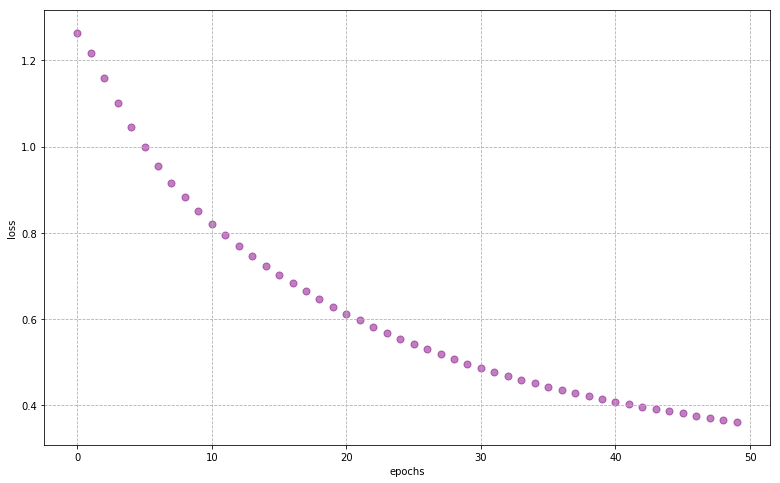

In [33]:
def plot_history(history, figsize=(13, 8), color='purple', s=50, alpha=0.5):
    plt.figure(figsize=figsize)
    plt.grid(zorder=0, linestyle='--')
    plt.scatter(history.epoch, history.history["loss"], c=color, s=s, alpha=alpha)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()
    
    
plot_history(history)

# Evaluating the Trained Model

We can look at the overall loss from our test data after training the model was trained

In [34]:
# Could also just use a batch to evaluate
loss_and_metrics = model.evaluate(x_test, y_test)

loss_and_metrics

30/30 [==============================] - 0s 2ms/step


0.35233762860298157

We can have predictions (probability the data point is a particular class based on our trained model)

In [35]:
probs = model.predict(x_test)
probs[:10]

array([[0.908252  , 0.05093198, 0.04081605],
       [0.86384463, 0.09747054, 0.03868483],
       [0.04356996, 0.38416925, 0.5722608 ],
       [0.84864336, 0.11452984, 0.03682683],
       [0.90514326, 0.04905558, 0.04580114],
       [0.03435349, 0.19180147, 0.77384496],
       [0.8097698 , 0.14288189, 0.04734832],
       [0.02354338, 0.19861117, 0.77784544],
       [0.02174823, 0.1567158 , 0.821536  ],
       [0.800807  , 0.15338777, 0.04580529]], dtype=float32)

We want to say what is the predicted class, so we pick just the largest probability for each result

In [36]:
predictions = np.argmax(probs, axis=1)

predictions[:10]

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0])

In [37]:
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.86666667])

In [38]:
report = classification_report(y_test.argmax(axis=1), predictions, labels=[0, 1])
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.83      0.62      0.71         8

   micro avg       0.95      0.82      0.88        22
   macro avg       0.92      0.78      0.84        22
weighted avg       0.94      0.82      0.87        22



Finally, we can see how accurate our model was by seeing if the predicted classes match the actual labels. Note that this is calculated differently from how the loss is calculated.

### But Behold!!!! An out of the box RFC comes into the fold! 

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf = RandomForestClassifier()

In [41]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
clf_preds = clf.predict(x_test)
clf.score(x_test, y_test)

0.9666666666666667

In [43]:
report = classification_report(y_test, clf_preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30



### What did we learn?
* keras is very useful instead of building a neural network from scratch

### Let's add another Layer

In [44]:
### Let's build a new model and add another layer
model_mlp = Sequential()


# hidden layers
model_mlp.add(Dense(input_dim=4, units=16, activation='relu'))
model_mlp.add(Dense(units=16, activation='relu'))


# classifier layer
model_mlp.add(Dense(units=3, activation='softmax'))


model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 51        
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
120/120 [==============================] - 0s 2ms/step - loss: 1.2107
Epoch 2/50
120/120 [==============================] - 0s 128us/step - loss: 1.1529
Epoch 3/50
120/120 [==============================] - 0s 133us/step - loss: 1.0900
Epoch 4/50
120/120 [==============================] - 0s 128us/step - loss: 1.0229
Epoch 5/50
120/120 [==============================] - 0s 140us/step - loss: 0.9686
Epoch 6/50
120/120 [==============================] - 0s 139us/step - loss: 0.9195
Epoch 7/50
120/120 [==============================] - 0s 141us/step - loss: 0.8792
Epoch 8/50
120/120 [==============================] - 0s 183us/step - loss: 0.8420
Epoch 9/50
120/120 [==============================] - 0s 172us/step - loss: 0.8106
Epoch 10/50
120/120 [==============================] - 0s 231us/step - loss: 0.7826
Epoch 11/50
120/120 [==============================] - 0s 159us/step - loss: 0.7564
Epoch 12/50
120/120 [==============================] - 0s 151us/step - loss: 0.7330
Epo

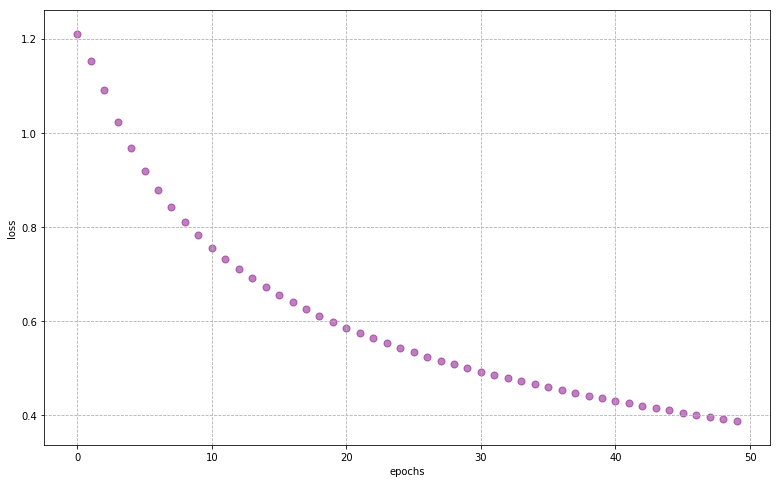

In [45]:
model_mlp.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

history_mlp = model_mlp.fit(x_train, y_train, epochs=50, batch_size=15, verbose=1)

plot_history(history_mlp)

In [46]:
loss_and_metrics = model_mlp.evaluate(x_test, y_test)

loss_and_metrics

30/30 [==============================] - 0s 2ms/step


0.3464241027832031

In [47]:
probs = model_mlp.predict(x_test)
predictions = np.argmax(probs, axis=1)
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.86666667])

In [48]:
report = classification_report(y_test.argmax(axis=1), predictions, labels=[0, 1])
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.50      0.67         8

   micro avg       1.00      0.82      0.90        22
   macro avg       1.00      0.75      0.83        22
weighted avg       1.00      0.82      0.88        22



#### Add another layer and plot the loss

In [54]:
# Build your model
model_mlp = Sequential()


# hidden layers
model_mlp.add(Dense(input_dim=4, units=16, activation='relu'))
model_mlp.add(Dense(units=24, activation='relu'))
model_mlp.add(Dense(units = 32, activation = 'relu'))

# classifier layer
model_mlp.add(Dense(units=3, activation='softmax'))


display(model_mlp.summary())

# Compile it


# fit your model using 100 epochs


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_17 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_18 (Dense)             (None, 32)                800       
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 99        
Total params: 1,387
Trainable params: 1,387
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/50
120/120 [==============================] - 0s 3ms/step - loss: 1.0949
Epoch 2/50
120/120 [==============================] - 0s 92us/step - loss: 1.0841
Epoch 3/50
120/120 [==============================] - 0s 126us/step - loss: 1.0692
Epoch 4/50
120/120 [==============================] - 0s 136us/step - loss: 1.0528
Epoch 5/50
120/120 [==============================] - 0s 169us/step - loss: 1.0358
Epoch 6/50
120/120 [==============================] - 0s 170us/step - loss: 1.0194
Epoch 7/50
120/120 [==============================] - 0s 228us/step - loss: 1.0030
Epoch 8/50
120/120 [==============================] - 0s 131us/step - loss: 0.9868
Epoch 9/50
120/120 [==============================] - 0s 236us/step - loss: 0.9707
Epoch 10/50
120/120 [==============================] - 0s 150us/step - loss: 0.9546
Epoch 11/50
120/120 [==============================] - 0s 135us/step - loss: 0.9384
Epoch 12/50
120/120 [==============================] - 0s 198us/step - loss: 0.9221
Epoc

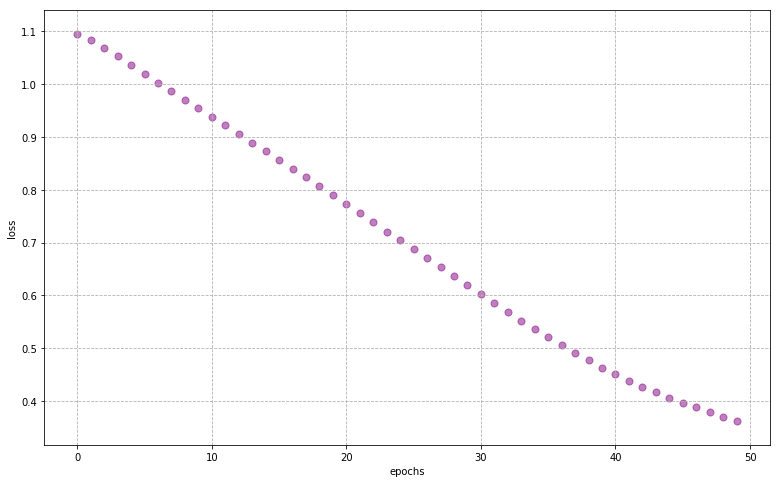

In [55]:
model_mlp.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

history_mlp = model_mlp.fit(x_train, y_train, epochs=50, batch_size=15, verbose=1)

plot_history(history_mlp)

In [49]:
# Evaluate your model
model_mlp.evaluate(x_test, y_test)

7608/7608 [==============================] - 0s 22us/step


0.32985218610422595

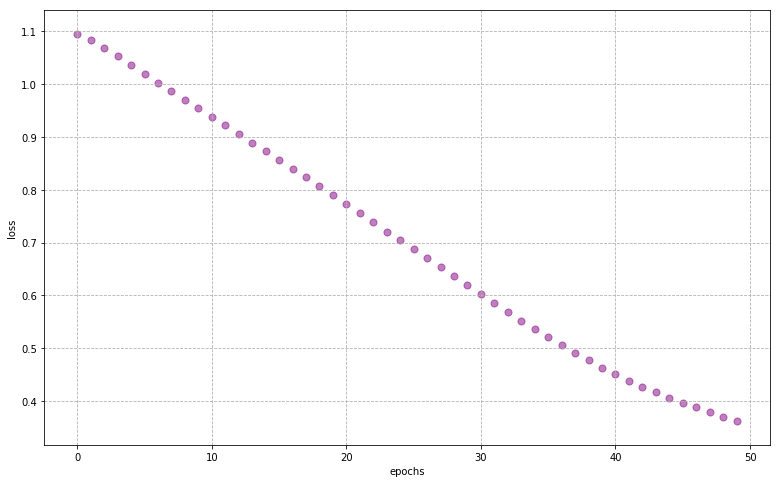

In [56]:
# Plot your loss
plot_history(history_mlp)

In [57]:
### Let's make it better
### Let's build a new model with 2 layers but a different optimizer
### User ADAM optimization
model_mlp = Sequential()


# hidden layers
model_mlp.add(Dense(input_dim=4, units=16, activation='relu'))
model_mlp.add(Dense(units=16, activation='relu'))


# classifier layer
model_mlp.add(Dense(units=3, activation='softmax'))


model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 51        
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_mlp.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam())

In [59]:
history_mlp = model_mlp.fit(x_train, y_train, batch_size=15, epochs=50, verbose=1)

Epoch 1/50
120/120 [==============================] - 1s 4ms/step - loss: 1.1778
Epoch 2/50
120/120 [==============================] - 0s 167us/step - loss: 1.1070
Epoch 3/50
120/120 [==============================] - 0s 160us/step - loss: 1.0424
Epoch 4/50
120/120 [==============================] - 0s 155us/step - loss: 0.9834
Epoch 5/50
120/120 [==============================] - 0s 154us/step - loss: 0.9309
Epoch 6/50
120/120 [==============================] - 0s 239us/step - loss: 0.8806
Epoch 7/50
120/120 [==============================] - 0s 214us/step - loss: 0.8338
Epoch 8/50
120/120 [==============================] - 0s 233us/step - loss: 0.7861
Epoch 9/50
120/120 [==============================] - 0s 138us/step - loss: 0.7389
Epoch 10/50
120/120 [==============================] - 0s 184us/step - loss: 0.6925
Epoch 11/50
120/120 [==============================] - 0s 223us/step - loss: 0.6466
Epoch 12/50
120/120 [==============================] - 0s 167us/step - loss: 0.6042
Epo

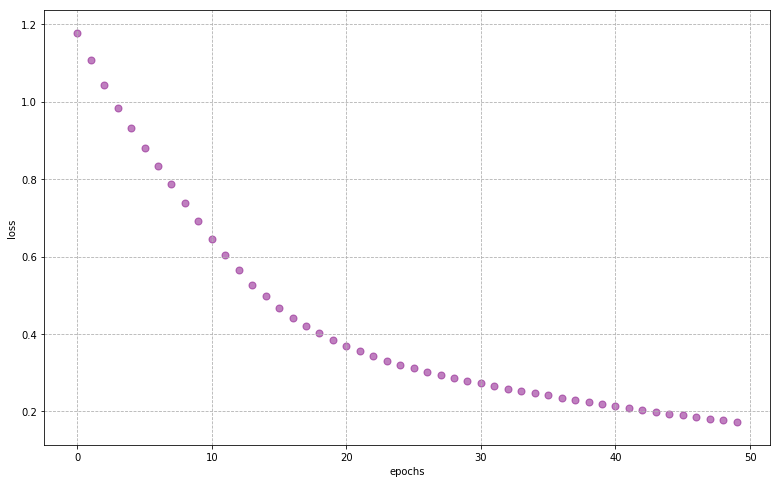

In [60]:
plot_history(history_mlp)

In [61]:
model_mlp.evaluate(x_test, y_test)

30/30 [==============================] - 0s 4ms/step


0.15756413340568542

In [62]:
probs = model_mlp.predict(x_test)
predictions = np.argmax(probs, axis=1)
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.93333333])

In [63]:
print(classification_report(y_test.argmax(axis=1), predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.75      0.86         8
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.92      0.92        30
weighted avg       0.95      0.93      0.93        30



### What did we learn?
- Use ADAM optimization
- Best practices for Deep Learning
    - ADAM/ReLu/Softmax
    - Onehotencode Labels